# Optimized Car Buying with real data

I will create a model that suggests the year, make, and model of a car for the best bang for your buck. 

#### Study Design

The model will be based on getting the most miles up to 200k miles for the least price in dollars per mile. 

I will scrape the Cars.com website with python and beautifulsoup4 to gather the needed information:

1) The current mileage.
2) The price of each car. 
3) The year of each car.


Note: this model is limited in application because determining the best bang for your buck involves many more variables that are often inconsistent such as maintenance, having to buy a car more often because its older, and others.

The parameters of this study will be choosing sedans less than 10 yrs old, only Honda Accord, Toyota Camry and Chevy Impalas, and will be selected by complex random sampling that will be stratified by 2 yr increments and by make.

**The code is reusable for other makes and models of cars, however, these are the ones I chose.


## Import website to be scraped and scrape it

In [3]:
#I chose to webscrape instead of an API because there were no free API's available for this one study.
import requests


#define make according to cars.com
honda = '20017'
toyota = '20088'
chevy = '20053'


#define model according to cars.com
accord = '20606'
camry = '20800'
impala = '21291'

#define our variables for path search criteria
mdl = accord+'%2C'+camry+'%2C'+impala
mk = honda+'%2C'+toyota+'%2C'+chevy
zip = ""
page='1'
page2='2'
#format the path to include the variables we chose (i.e. honda accord)
path = "https://www.cars.com/for-sale/searchresults.action/?cpoId=28444&cylCntId=28108&dealerType=all&dlrRvwId=47621&drCntId=28004&mdId={}&mkId={}&mlgId=28861&page={}&perPage=100&rd=99999&searchSource=SORT&sort=best-deal&zc={}".format(mdl,mk,page,zip)
path2 = "https://www.cars.com/for-sale/searchresults.action/?cpoId=28444&cylCntId=28108&dealerType=all&dlrRvwId=47621&drCntId=28004&mdId={}&mkId={}&mlgId=28861&page={}&perPage=100&rd=99999&searchSource=SORT&sort=best-deal&zc={}".format(mdl,mk,page2,zip)


r = requests.get(path)
print(len(r.text))
r2 = requests.get(path2)
test = r.text+r2.text
print(len(test))


2283102
4623322


In [5]:
# import webscraping libraries
import csv
from bs4 import BeautifulSoup
soup = BeautifulSoup(test)


# determine the number of iterations by how many cars came in the search
import math

filter_count = int(soup.find('span',{'class':'filter-count'}).text.strip())
print(math.ceil(filter_count/100))

10


In [6]:
# create csv file with webscraped data
# define column headers
columns = ['year','make','model','price','mileage','price_per_mile']

cars = soup.findAll('div',{'class':'listing-row__details'})

with open('cars_data_file.csv', mode='w') as cars_file:
    cars_file= csv.writer(cars_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    cars_file.writerow(columns)
    for car in cars:
        #get data for each car
        year = car.findAll('h2',{'class':'listing-row__title'})[0].text.strip().split(' ')[0]
        make = car.findAll('h2',{'class':'listing-row__title'})[0].text.strip().split(' ')[1]
        model = car.findAll('h2',{'class':'listing-row__title'})[0].text.strip().split(' ')[2]
        price = int(car.findAll('span',{'class':'listing-row__price'})[0].text.strip().split(' ')[0].replace("$","").replace(",",""))
        mileage = int(car.findAll('span',{'class':'listing-row__mileage'})[0].text.strip().split(' ')[0].replace(",",""))
        mileage_left = 200000-mileage
        price_per_mile = round(int(price)/int(mileage_left),3)
        car_data = [cars.index(car),year,make,model,price,mileage,price_per_mile]
        #print(car_data)

        cars_file.writerow(car_data)


## Import the current dataset

In [7]:
#import necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()     #Use seaborn style on matplotlib plots
path = '/Users/mitty/Documents/coding/jupyter/practice/best_car_buy/cars_data_file.csv'

df_train = pd.read_csv(path)

df_train.head(99)

,year,make,model,price,mileage,price_per_mile
0,2017,Chevrolet,Impala,16665,10805,0.088
1,2020,Chevrolet,Impala,26831,13142,0.144
2,2017,Chevrolet,Impala,21595,16500,0.118
3,2016,Chevrolet,Impala,25995,20305,0.145
4,2017,Chevrolet,Impala,16995,21560,0.095
...,...,...,...,...,...,...
94,2019,Chevrolet,Impala,19975,15558,0.108
95,2019,Chevrolet,Impala,21999,15597,0.119
96,2020,Chevrolet,Impala,26992,15750,0.146
97,2019,Chevrolet,Impala,26990,15889,0.147


In [ ]:
df_train.loc[df_train['make']=='Toyota',[' ','year','make','model','price','mileage','price_per_mile']]

## Exploratory Data Analysis

In [ ]:
# Check for null values


sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### If there are null values then decisions should be made to correct the data. We could fill the nulls with the average value of the current data or we could drop the row all together. Both choices have an impact on the level of error in the study, but in our case, there are no null values to worry about.

In [8]:
#check to see total number of samples
df_train.count()

year              200
make              200
model             200
price             200
mileage           200
price_per_mile    200
dtype: int64

In [ ]:
# view the 10 models with the lowest price per mile
df_train.head(10).sort_values(by='price_per_mile', ascending=True)

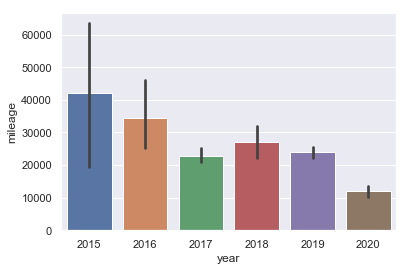

In [10]:
sns.barplot(x="year", y="mileage", data=df_train)

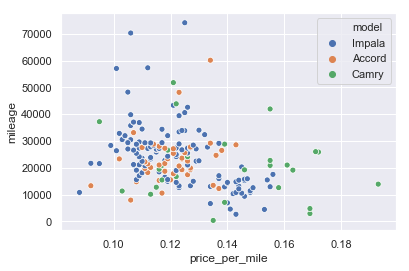

In [9]:
sns.scatterplot(x="price_per_mile", y="mileage", hue="model", data=df_train)

In [ ]:
sns.regplot(x="price_per_mile", y="mileage", data=df_train)

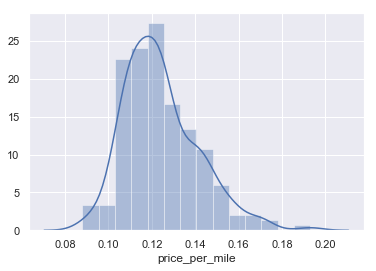

In [11]:
sns.distplot(df_train["price_per_mile"]);

In [ ]:
sns.distplot(df_train["mileage"]);